# Tutorial 1: The Basics

Let's learn by example. We start prediction future energy prices and will explore the basics of the library.

We assume you already have installed the package and have a working Python environment. If not, please refer to the [installation guide](../contents.rst#installing).

```shell
python -m neuralprophet --version
```

If NeuralProphet is installed, you should see the installed version number. Otherwise you will get a package not found error message.

## Loading the dataset

For our tutorials we work with energy price data over the 4 years from Spain. The dataset was published on [Kaggle](https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather) and contains a lot of information to which we will come back later. For now we use a prepared version of the dataset with the hourly energy price data only.

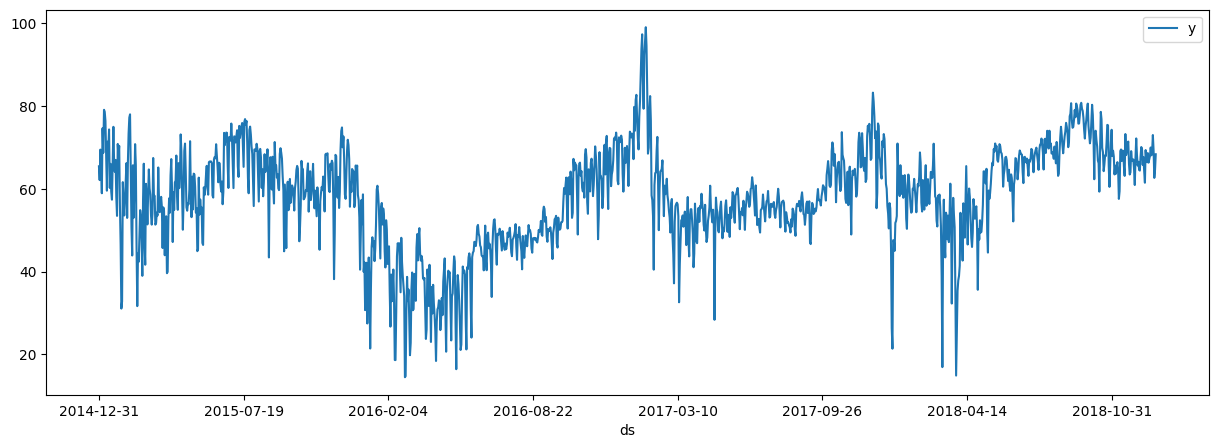

In [1]:
import pandas as pd

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
# Plot the dataset, showing price (y column) over time (ds column)
plt = df.plot(x="ds", y="y", figsize=(15, 5))

Note: Whenever you use a dataset with NeuralProphet, it must be a pandas dataframe with the following format and properties:

1. Time series column must be named "ds" and contain a datetime object without timezone information.
2. Value column must be named "y" and contain a float value.

## Setting up the model

In [2]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet

# Create a NeuralProphet model with default parameters
m = NeuralProphet()

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 173
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (46) is too small than the required number for the learning rate finder (229). The results might not be optimal.


Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


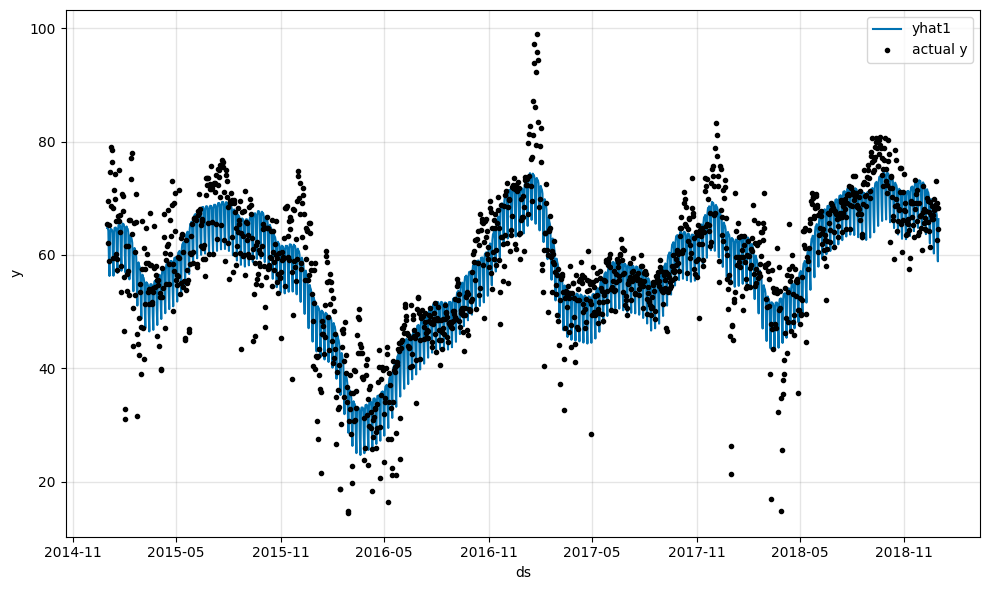

In [3]:
# Forcast on the time frame of the existing dataset
forecast = m.predict(df)

# Visualize the learned forecast and the actual data
fig = m.plot(forecast)

## Forecast the future

To predict future values we have to extend our dataframe. In our example we want to create a forecast of the next year (meaning 365 days). Then we have to run the prediction again on the extended dataframe.

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


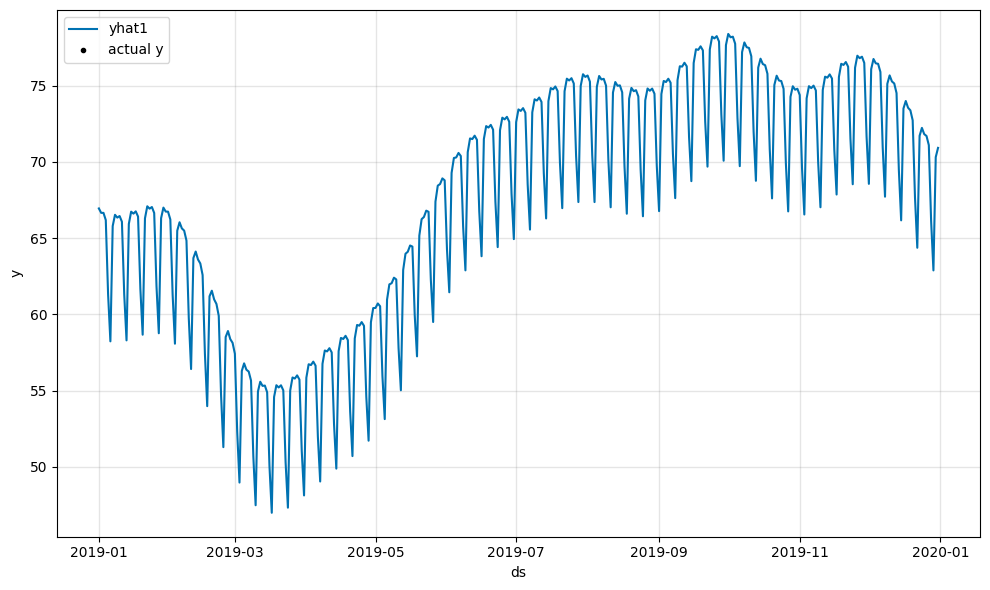

In [4]:
# Create a new dataframe reaching 365 into the future for our forecast
df_future = m.make_future_dataframe(df, periods=365)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
fig = m.plot(forecast)